### Wstęp do Uczenia Maszynowego 
##### Laboratorium 10

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

### 1. Selekcja zmiennych

### Zadanie 1
----
Przyjrzyj się dokumentacji funkcji `SelectFromModel()`. Wczytaj zbiór danych `SAheart.data`, podziel na zbiór treningowy i testowy w stosunku 3:2.

a) Przygotuj `pipeline`, który przygotuje model regresji logistycznej.

b) Dodaj selekcję zmiennych z wykorzystaniem `SelectFromModel()` w utworzonym `pipeline` w punkcie a). Do funkcji `SelectFromModel()` wykorzystaj model regresji logistycznej a do modelowania wykorzystaj drzewo decyzyjne.

c) Przygotuj kolejny `pipeline`, który do wyboru zmiennych zamiast funkcji `SelectFromModel()` wykorzysta funkcję `SequentialFeatureSelector()`.

#### a)

In [2]:
df = pd.read_csv("SAheart.data")

In [3]:
y = df.chd
X = df.drop(['chd', 'row.names'], axis = 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

categorical_features = list(X.dtypes[(X.dtypes == 'object') | (X.dtypes == 'category')].index)
numerical_features = list(X.dtypes[(X.dtypes != 'object') & (X.dtypes != 'category')].index)

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

numerical_transformer = Pipeline([
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('onehot', categorical_transformer, categorical_features),
    ('scaler', numerical_transformer, numerical_features)
])

In [6]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('pre', preprocessor),
    ('lm', LogisticRegression())
])

In [7]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['famhist']),
                                                 ('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sbp', 'tobacco', 'ldl',
                                                   'adiposity', 'typea',
                                                   'obesity', 'alcohol',
                                                   'age'])])),
                ('lm', LogisticRegression())])

In [8]:
pipeline.score(X_test, y_test)

0.7567567567567568

#### b)

In [9]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('pre', preprocessor),
    ('selector', SelectFromModel(LogisticRegression(), max_features = 5)),
    ('tree', DecisionTreeClassifier())
])

In [10]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['famhist']),
                                                 ('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sbp', 'tobacco', 'ldl',
                                                   'adiposity', 'typea',
                                                   'obesity', 'alcohol',
                                                   'age'])])),
                ('selector',
                 SelectFromModel(estimator=LogisticRegression(),
                                 max_features=5)),
                ('tree', DecisionTreeClassifier())])

In [11]:
pipeline.score(X_test, y_test)

0.6486486486486487

#### c)

In [12]:

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('pre', preprocessor),
    ('selector_model', SequentialFeatureSelector(DecisionTreeClassifier()))
])

In [13]:
pipeline.fit(X, y)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['famhist']),
                                                 ('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sbp', 'tobacco', 'ldl',
                                                   'adiposity', 'typea',
                                                   'obesity', 'alcohol',
                                                   'age'])])),
                ('selector_model',
                 SequentialFeatureSelector(estimator=DecisionTreeClassifier()))])

#### *) GridSearch dla punktu b)

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('pre', preprocessor),
    ('selector', SelectFromModel(LogisticRegression())),
    ('tree', DecisionTreeClassifier())
])

params = {
    'selector__max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'tree__max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
    'tree__min_samples_leaf': [3, 4, 5, 6, 7, 8, 9]
}

grid_pipeline = GridSearchCV(pipeline,
                             cv = 3,
                             param_grid = params)

In [15]:
grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['famhist']),
                                                                        ('scaler',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['sbp',
                                                                          'tobacco',
                                                                          'ldl',
                                                                          'adiposity',
                                                                          'typea',
                                                                          'obesity',
                                                                          'alcohol',
                                                                          'age'])])),
                                       ('selector',
                                        SelectFromModel(estimator=LogisticRegression())),
                                       ('tree', DecisionTreeClassifier())]),
             param_grid={'selector__max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'tree__max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
                         'tree__min_samples_leaf': [3, 4, 5, 6, 7, 8, 9]})

In [16]:
grid_pipeline.best_params_

{'selector__max_features': 7,
 'tree__max_depth': 6,
 'tree__min_samples_leaf': 4}

In [17]:
grid_pipeline.score(X_test, y_test)

0.7027027027027027

### 2. PCA

In [18]:
import pandas as pd
import numpy as np

In [19]:
from sklearn import datasets
wine_data = datasets.load_wine(as_frame=True)
df = wine_data.data

In [20]:
print(df.shape)

(178, 13)


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [22]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit_transform(scaled_df)

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [24]:
print(pca.components_)

[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]]


In [25]:
nums = np.arange(14)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(scaled_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

<Axes: >

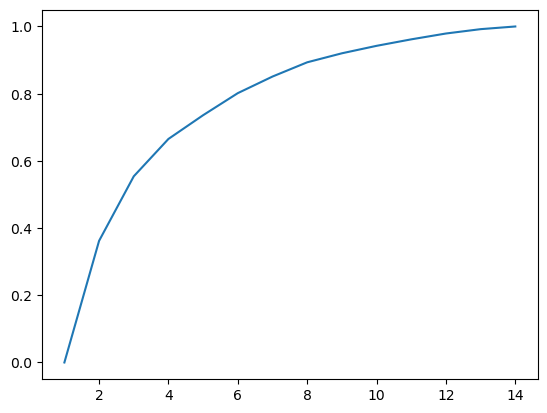

In [26]:
import seaborn as sns
np.arange(1, 12, 1, dtype=int)
sns.lineplot(x = np.arange(1, 15, 1, dtype=int), y = var_ratio)

### Zadanie 2
----
Wczytaj zbiór danych `pima.csv`.

a) Podziel zbiór na treningowy i testowy w proporcji 4:1.

b) Na zbiorze treningowym wyznacz komponenty uzyskane metodą PCA. Sporządź wykres, który ukazuje jaki procent wariancji jest wyjaśniany przez kolejne komponenty.

c) Dopasuj model regresji logistycznej dla danych treningowych pełnych, dla danych po PCA, dla 5 pierwszych komponentów po PCA, dla 2 pierwszych komponentów po PCA.

d) Policz dokładność na zbiorze testowym dla każego modelu z punktu c).

e) Przygotuj `pipeline` ze wszystkimi krokami dla modelu regresji logistycznej na danych po PCA i policz dokładność na zbiorze testowym.

*Wyniki powinny być takie same jak dla drugiego modelu z punktu c)*

In [27]:
pima = pd.read_csv("pima.csv")

In [28]:
y = pima.Outcome
X = pima.drop(["Outcome"], axis = 1)

#### a)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### b)

In [30]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

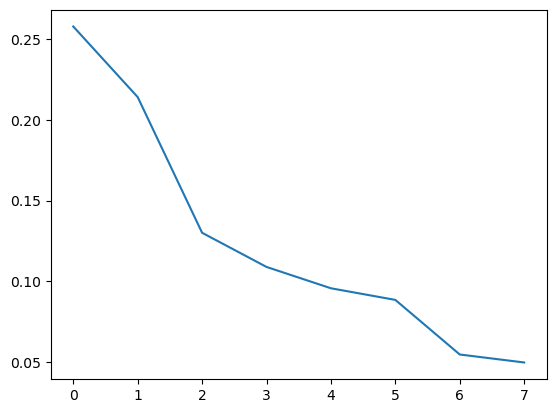

In [31]:
import matplotlib.pyplot as plt

pca = PCA()

pca.fit(X_train)
plt.plot(pca.explained_variance_ratio_)

In [32]:
pca.components_

array([[ 0.07934135,  0.39928668,  0.317484  ,  0.45860644,  0.46716971,
         0.44404094,  0.28782145,  0.15779114],
       [ 0.60975133,  0.18813665,  0.21708825, -0.28735625, -0.20331691,
        -0.08528076, -0.09794793,  0.6363196 ],
       [-0.00170399,  0.44830378, -0.58671017, -0.24401349,  0.31432977,
        -0.35294198,  0.40775036,  0.07495199],
       [ 0.10646907, -0.43811106,  0.12206501,  0.09197711, -0.26606252,
        -0.0872879 ,  0.83157078,  0.05869387],
       [-0.35934464,  0.42695487,  0.19420204, -0.49603936, -0.42474388,
         0.40577128,  0.21252658, -0.12077354],
       [ 0.34529365, -0.09148262, -0.6427311 ,  0.12747994, -0.23789073,
         0.62085618, -0.02147515, -0.02309229],
       [-0.5608085 ,  0.02958425, -0.20332615,  0.36048859, -0.27801004,
        -0.0525984 , -0.06335216,  0.65517584],
       [-0.2184199 , -0.46981103, -0.02808373, -0.49683592,  0.50649114,
         0.3323978 ,  0.01234749,  0.34170408]])

In [33]:
X_train2 = pca.transform(X_train)
X_test2 = pca.transform(X_test)

#### c), d)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty = None, max_iter = 1000)

# regresja logistyczna
model.fit(X_train, y_train)
print("oryginalne dane: ", np.round(model.score(X_test, y_test), 4))

model.fit(X_train2, y_train)
print("PCA dane: ", np.round(model.score(X_test2, y_test), 4))

model.fit(X_train2[:,0:5], y_train)
print("PCA dane (5 pierwszych): ", np.round(model.score(X_test2[:,0:5], y_test), 4))

model.fit(X_train2[:,0:2], y_train)
print("PCA dane (2 pierwsze): ", np.round(model.score(X_test2[:,0:2], y_test), 4))

oryginalne dane:  0.8312
PCA dane:  0.8312
PCA dane (5 pierwszych):  0.8442
PCA dane (2 pierwsze):  0.7922


#### e)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('regression', LogisticRegression(penalty = None, max_iter = 1000))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('regression',
                 LogisticRegression(max_iter=1000, penalty=None))])

In [36]:
pipeline.score(X_test, y_test)

0.8311688311688312